<Body>   
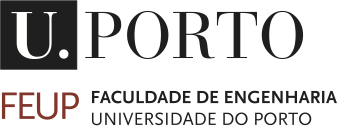   
<h1> <b>Machine Learning 2022/2023 </b> </h1>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---


$\color{yellow}{Name\text{ }Student\text{ }1:}$
Francisco Soares Pinto da Silva Neves


# Assignment 1

## Exercise 1 (Paper and pencil exercise)

Consider the linear regression problem (with loss function $J(\boldsymbol{\theta}) = \|Y-X\boldsymbol{\theta}\|^2$) for the following data set:
\begin{array}{|c|c|c|c|}
	%$\boldsymbol{x}_1$ 
	x_1 & x_2 & y \\
	\hline
	\pi/4 &\pi/4 &2 \\
	-\pi/3 &\pi/3 &-2 \\
	\pi/8 &\pi/8 &1 
\end{array}

with the model $y = f_{\boldsymbol{\theta}}(x)$, where  $f_{\boldsymbol{\theta}}(x) = \theta_0 + \theta_1 x_1 + \theta_2 \sin(x_1+x_2) + \theta_3 \cos (x_1+x_2)$. 

a) Obtain the expression for the gradient $\nabla J(\boldsymbol{\theta})$ as a function  of the vector of labels $Y$ and the related matrix of features $X$. Obtain explicitly $X$ and $Y$. 
	



$\color{green}{Solution\text{ } 1a)}$  **(Paste a digitalized image of your solution below)**





![ex1a](ex1a.png)

b) Say if the following statement is true or false, justifying your response. "The previous linear regression problem has a closed-form solution and the minimization of the loss function has led to an unique solution".

In [318]:
# Import necessary libraries for code below
import numpy as np
from math import isclose
import matplotlib.pyplot as plt

$\color{green}{Solution\text{ } 1b)}$ **(Present your justification here)**

The statement is false.

We can prove in two ways:

* if $|XX^T|\approx 0$ (the matrix is singular) then the solution is not unique
* if the singular value matrix has a rank lower and not equal to the number of features of the input


## Exercise 2 (Python exercise)

Consider the following data for a linear regression problem where $x_i$ is the feature $i^{th}$ and y is the output:


\begin{array}{llll}
		\hline \hline
		x_1  & x_2 & x_3 & y \\
		\hline \hline
		340    & 16    & 356   & 1.5        \\
		665    & 25    & 690   & 2.8        \\
		368    & 15    & 383   & 1.7        \\
		331    & 15    & 346   & 1.3      \\
		954    & 40    & 994   & 5.0        \\
		\hline
\end{array}
	


Calculate the solutions for the following regression models. If the solution is not unique, please provide a better approach. **Note: do not use the sklearn library**. 

a) $\hat{y} = \theta_1 x_1 + \theta_2 x_2$.

In [319]:
# 1. Saving data
x1 = np.array([340, 665, 368, 331, 954]).reshape(-1, 1)
x2 = np.array([16, 25, 15, 15, 40]).reshape(-1, 1)
x3 = np.array([356, 690, 383, 346, 994]).reshape(-1, 1)
Y = np.array([1.5, 2.8, 1.7, 1.3, 5.0]).reshape(-1, 1)

# 2. Make inputs X for both a) and b)
Xa = np.concatenate((x1,x2), axis = 1)
Xb = np.concatenate((x1,x2,x3), axis = 1)

## Also squared inputs
A, B = np.dot(Xa.T, Xa), np.dot(Xb.T, Xb)

# Auxiliar functions
## Checking solution uniqueness
### Input is the matrix of the input squared: np.dot(matrix.T, matrix)
def is_solution_unique(matrix_squared):
    # Using determinant rule if determinant is close to zero, 
    # then matrix is singular and there is no unique solution
    condition1 = isclose(np.linalg.det(matrix_squared), 0, abs_tol = 1e-2)

    # Using singular value decomposition. If the rank of the
    # singular value matrix is lower 
    # than the number of columns of the original matrix
    # then there is no unique solution
    u, s, vh = np.linalg.svd(matrix_squared)
    condition2 = np.linalg.matrix_rank(np.diag(s)) < matrix_squared.shape[1]

    # If at least one of the conditions is false, then 
    # there is no unique solution
    return condition1 and condition2

def regularize(X, Y, lambda_):
    X_squared = np.dot(X.T, X)
    num_features = X.shape[1]

    Lambda = lambda_ * np.eye(num_features)
    X_squared_augmented = X_squared + Lambda
    det = np.linalg.det(X_squared_augmented)
    S = np.diag(np.linalg.svd(X_squared_augmented)[1])
    W = np.dot(np.dot(np.linalg.inv(X_squared_augmented), X.T), Y)
    Y_hat = np.dot(X, W)
    mse = np.square(Y_hat - Y).mean(axis = 0)
    return {'weights': W, 'singular_matrix': S, 'mse': mse, 'det': det, 'prediction': Y_hat}


In [320]:
# Solution a)
Wa = np.dot(np.dot(np.linalg.inv(A), Xa.T), Y)
print(f'# Solution for a) is:\n{Wa}')

# Testing uniquess of solution
print('# Testing solution uniqueness for model a)')
a_is_unique = is_solution_unique(A)
print('Solution a) is not unique') if a_is_unique else print('Solution a) is unique')

# Solution for a) is:
[[0.00277318]
 [0.0487576 ]]
# Testing solution uniqueness for model a)
Solution a) is unique


b) $\hat{y} = \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3$

In [321]:
# Solution b)
Wb = np.dot(np.dot(np.linalg.inv(B), Xb.T), Y)
print(f'# Solution for b) is:\n{Wb}')

# Testing uniquess of solution
print('# Testing solution uniqueness for model b)')
b_is_unique = is_solution_unique(B)
print('Solution b) is not unique') if b_is_unique else print('Solution b) is unique')

# Solution for b) is:
[[-0.00145893]
 [ 0.0505187 ]
 [ 0.00269628]]
# Testing solution uniqueness for model b)
Solution b) is not unique


# Regularization for different lambdas

In [322]:
lambdas = [1e-3, 1e-2, 1e-1, 1, 10, 20, 50, 100]
regularizations = {}

for lambda_ in lambdas:
    regularizations[lambda_] = regularize(Xb, Y, lambda_)

# Plotting fitting between prediction and targets for different lambdas

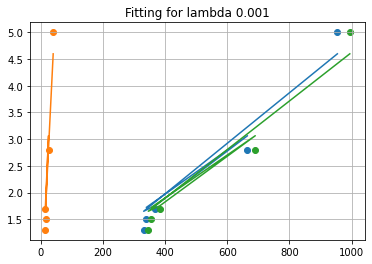

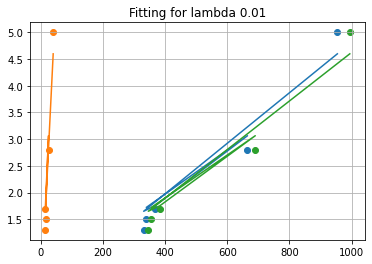

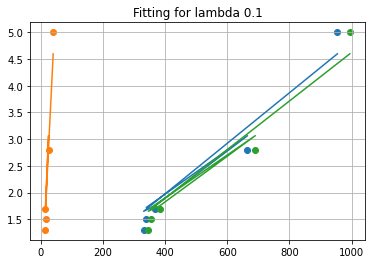

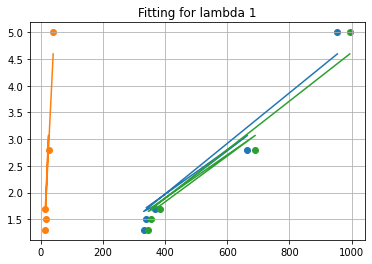

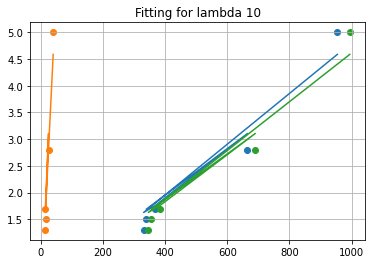

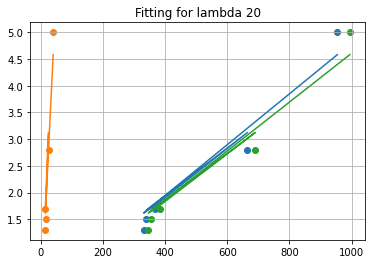

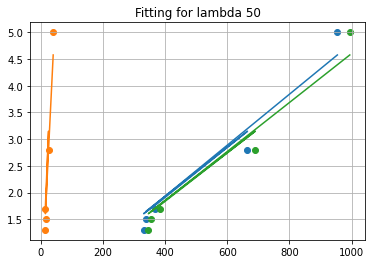

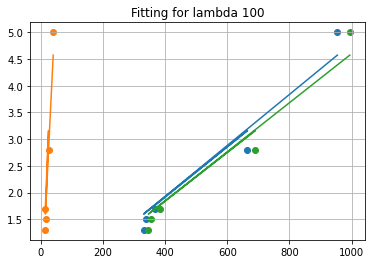

In [323]:
for lbd in lambdas:
    plt.scatter(Xb[:,0], Y)
    plt.plot(Xb[:,0], regularizations[lbd]['prediction'])
    plt.scatter(Xb[:,1], Y)
    plt.plot(Xb[:,1], regularizations[lbd]['prediction'])
    plt.scatter(Xb[:,2], Y)
    plt.plot(Xb[:,2], regularizations[lbd]['prediction'])
    plt.grid()
    plt.title(f'Fitting for lambda {lbd}')
    plt.show()

## Plotting lambda vs mean squared error

Text(0, 0.5, 'MSE')

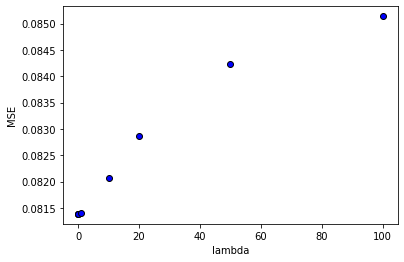

In [324]:
# lambda vs mean squared error
mses = [data['mse'] for lbd, data in regularizations.items()]
plt.scatter(lambdas, mses, color = "blue", edgecolor = "black")
plt.xlabel('lambda')
plt.ylabel('MSE')

## Plotting lambda X determinants of regularized input 

Text(0, 0.5, 'Determinants')

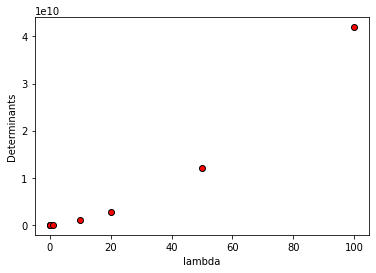

In [325]:
# lambda vs determinants
dets = [data['det'] for lbd, data in regularizations.items()]
plt.scatter(lambdas, dets, color = "red", edgecolor = "black")
plt.xlabel('lambda')
plt.ylabel('Determinants')

## Plotting lambda X rank of singular matrices

Text(0, 0.5, 'Singular matrix ranks')

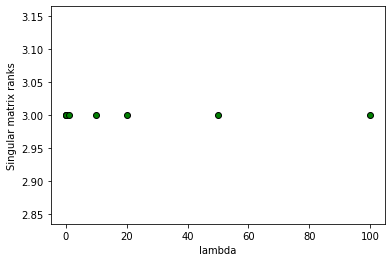

In [326]:
# lambda vs rank of singular matrix
ss = [np.linalg.matrix_rank(data['singular_matrix']) for lbd, data in regularizations.items()]
plt.scatter(lambdas, ss, color = "green", edgecolor = "black")
plt.xlabel('lambda')
plt.ylabel('Singular matrix ranks')